In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

In [5]:
# Загрузка данных из CSV файлов
df1 = pd.read_csv('/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/clusterization/data/baseline_more_dispertion/raw_data.csv')
df2 = pd.read_csv('/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/clusterization/data/new_release/raw_data.csv')

# Преобразование startTime в формат даты
df1['startTime'] = pd.to_datetime(df1['startTime'], unit='ms')
df2['startTime'] = pd.to_datetime(df2['startTime'], unit='ms')

In [8]:
df1.head()

,startTime,endTime,sampleLabel,responseTime,isSuccsessful,isFailed,responseCode
0,2024-05-21 14:06:18.925,1716300378956,GET_mainPage,31,1,0,200
1,2024-05-21 14:06:18.978,1716300379024,GET_mainPage,46,1,0,200
2,2024-05-21 14:06:19.033,1716300379061,GET_mainPage,28,1,0,200
3,2024-05-21 14:06:19.061,1716300379085,GET_category,24,1,0,200
4,2024-05-21 14:06:19.128,1716300379141,GET_mainPage,13,1,0,200


## Рассмотрим отдельно каждый Samplerlabel

In [9]:
df1_filtered = df1[df1['sampleLabel'] == "POST_confirm"]
df2_sample = df2[df2['sampleLabel'] == "POST_confirm"]

In [10]:
df1_filtered

,startTime,endTime,sampleLabel,responseTime,isSuccsessful,isFailed,responseCode
153,2024-05-21 14:06:20.140,1716300380350,POST_confirm,210,1,0,200
212,2024-05-21 14:06:20.410,1716300380706,POST_confirm,296,1,0,200
216,2024-05-21 14:06:20.501,1716300380728,POST_confirm,227,1,0,200
226,2024-05-21 14:06:20.211,1716300380793,POST_confirm,582,1,0,200
227,2024-05-21 14:06:20.739,1716300380798,POST_confirm,59,1,0,200
...,...,...,...,...,...,...,...
49986,2024-05-21 14:10:47.533,1716300647684,POST_confirm,151,1,0,200
49987,2024-05-21 14:10:47.682,1716300647820,POST_confirm,138,1,0,200
49991,2024-05-21 14:10:48.222,1716300649200,POST_confirm,978,1,0,200
49994,2024-05-21 14:10:50.069,1716300651049,POST_confirm,980,1,0,200


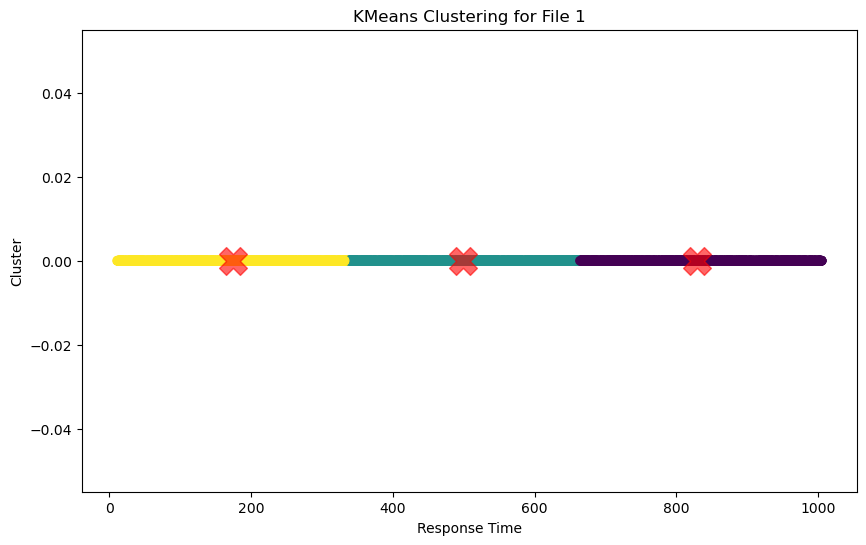

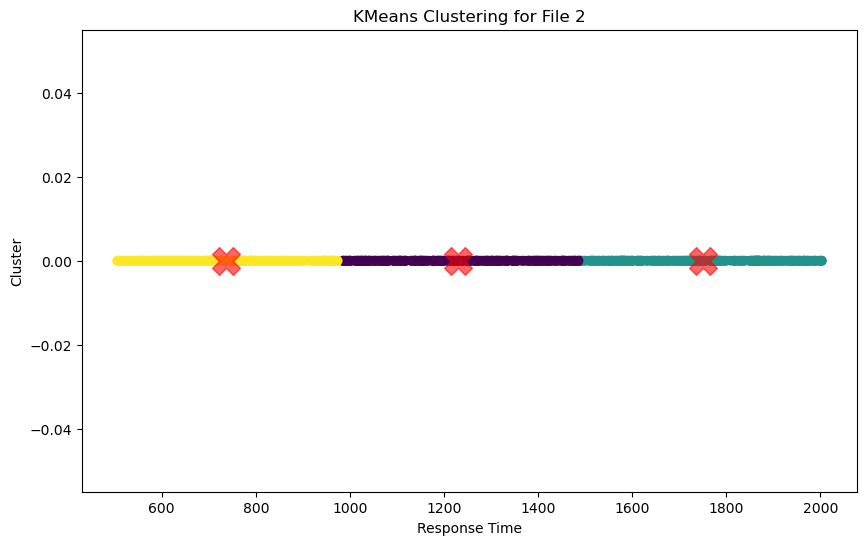

In [29]:
# Функция для загрузки и обработки данных
def load_and_process_data(file_path, method_name):
    df = pd.read_csv(file_path)
    df = df[df['sampleLabel'] == method_name]
    # Извлекаем только нужный столбец
    response_times = df['responseTime'].values.reshape(-1, 1)
    return response_times

# Функция для выполнения кластеризации и построения графиков
def perform_kmeans_and_plot(response_times, n_clusters=3, title=''):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(response_times)
    
    # Получаем центры кластеров и предсказания
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.scatter(response_times, np.zeros_like(response_times), c=labels, cmap='viridis')
    plt.scatter(centroids, np.zeros_like(centroids), c='red', s=400, alpha=0.6, marker='X')
    plt.title(title)
    plt.xlabel('Response Time')
    plt.ylabel('Cluster')
    plt.show()

# Пути к CSV файлам
file_path1 = '/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/clusterization/data/baseline_more_dispertion/raw_data.csv'
file_path2 = '/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/clusterization/data/new_release/raw_data.csv'

# Загрузка и обработка данных
response_times1 = load_and_process_data(file_path1, "POST_confirm")
response_times2 = load_and_process_data(file_path2, "POST_confirm")

# Выполнение кластеризации и построение графиков
perform_kmeans_and_plot(response_times1, title='KMeans Clustering for File 1')
perform_kmeans_and_plot(response_times2, title='KMeans Clustering for File 2')


# K ближайших соседей

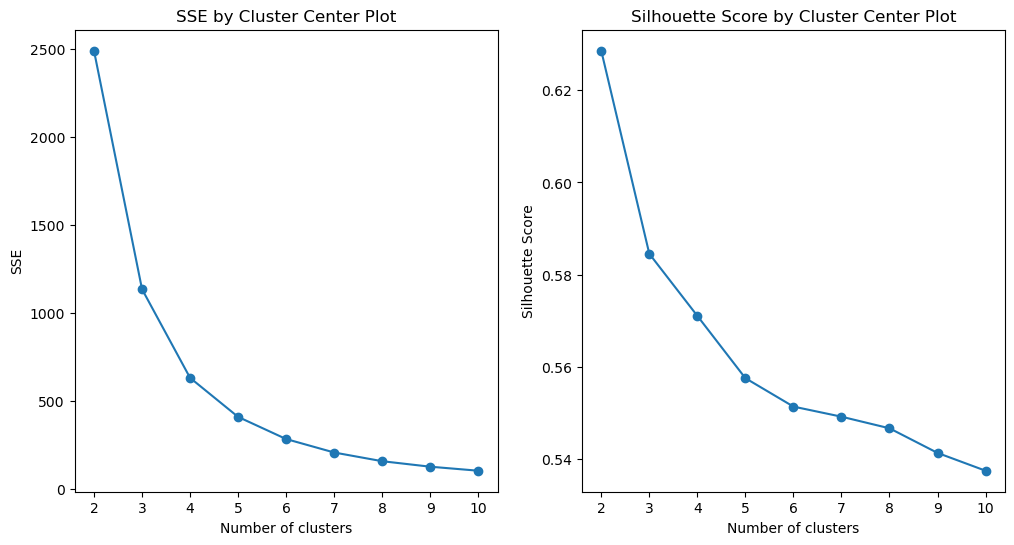

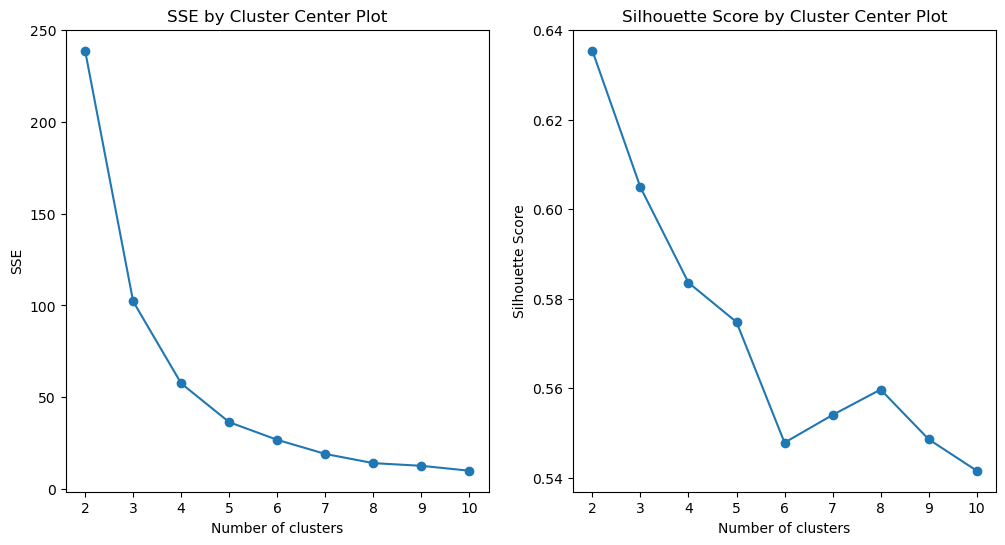

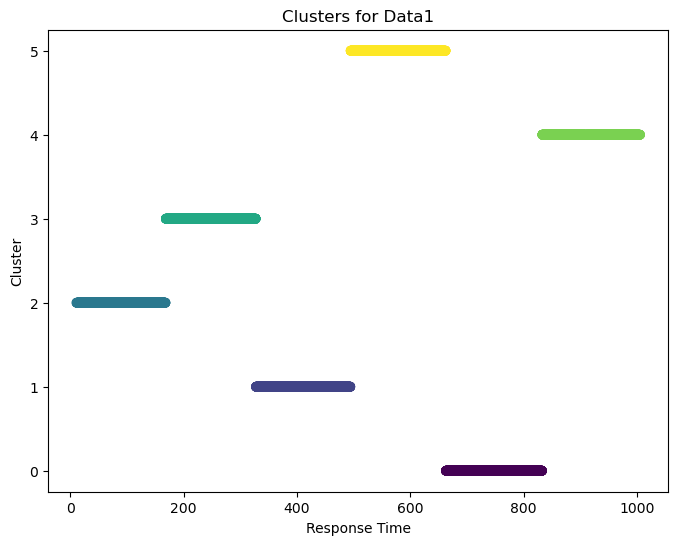

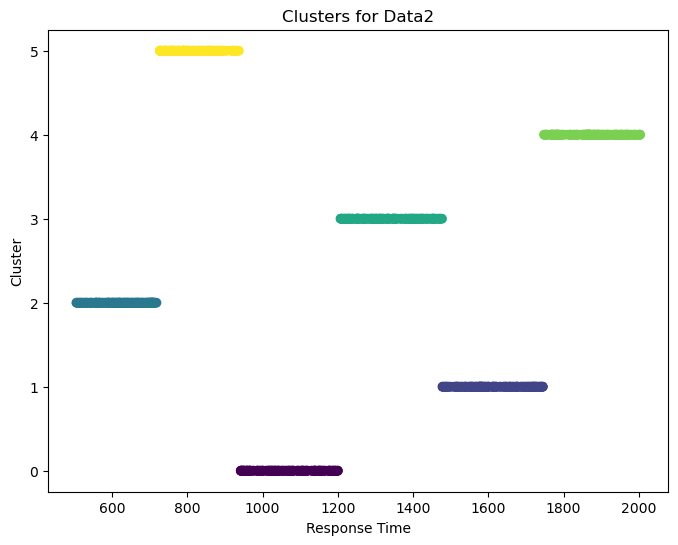

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Загрузка данных из CSV файлов
file1 = '/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/clusterization/data/baseline_more_dispertion/raw_data.csv'
file2 = '/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/clusterization/data/new_release/raw_data.csv'
data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)

# Выбор только необходимого столбца для анализа
data1 = data1[data1['sampleLabel'] == 'POST_confirm']
data2 = data2[data2['sampleLabel'] == 'POST_confirm']
data1 = data1[['responseTime']]
data2 = data2[['responseTime']]

# Масштабирование данных
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)
data2_scaled = scaler.fit_transform(data2)

# Кластеризация K-ближайших соседей
# Определение оптимального количества кластеров с использованием метода локтя и коэффициента силуэта
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    sse = []
    silhouette_scores = []

    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(iters, sse, marker='o')
    ax1.set_title('SSE by Cluster Center Plot')
    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('SSE')

    ax2.plot(iters, silhouette_scores, marker='o')
    ax2.set_title('Silhouette Score by Cluster Center Plot')
    ax2.set_xlabel('Number of clusters')
    ax2.set_ylabel('Silhouette Score')

    plt.show()

# Найдём оптимальное количество кластеров для каждого набора данных
find_optimal_clusters(data1_scaled, 10)
find_optimal_clusters(data2_scaled, 10)

# Применение K-ближайших соседей с выбранным количеством кластеров (предположим, что 6 кластеров - оптимально)
kmeans1 = KMeans(n_clusters=6, random_state=42)
kmeans2 = KMeans(n_clusters=6, random_state=42)
data1['Cluster'] = kmeans1.fit_predict(data1_scaled)
data2['Cluster'] = kmeans2.fit_predict(data2_scaled)

# Визуализация кластеров
def plot_clusters(data, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['responseTime'], data['Cluster'], c=data['Cluster'], cmap='viridis')
    plt.title(title)
    plt.xlabel('Response Time')
    plt.ylabel('Cluster')
    plt.show()

plot_clusters(data1, 'Clusters for Data1')
plot_clusters(data2, 'Clusters for Data2')
